In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Train_Data.csv')
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [3]:
print(df.shape)

(3630, 7)


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [5]:
df.groupby('sex')['sex'].agg('count')

sex
female    1601
male      2029
Name: sex, dtype: int64

In [6]:
pd.crosstab(df.sex,df.smoker)

smoker,no,yes
sex,,
female,1405,196
male,1665,364


In [7]:
temp=df[(df.age>20.0)&(df.age<30)]
# temp[temp.smoker=='yes'].mean
# temp.groupby('smoker').describe()
print(temp[temp.smoker=='yes'].mean(),"\n")
print(temp[temp.smoker=='no'].mean())

age            24.835930
bmi            30.846878
children        1.735294
charges     28103.627529
dtype: float64 

age           25.291307
bmi           29.041925
children       2.757480
charges     6394.610615
dtype: float64


<ipython-input-7-4b3890aa92dd>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(temp[temp.smoker=='yes'].mean(),"\n")
<ipython-input-7-4b3890aa92dd>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(temp[temp.smoker=='no'].mean())


As we can notice here that the person who smokes has to pay a lot for insurance in the age of 20-30, we can view it for a lot more.

Text(0, 0.5, 'count')

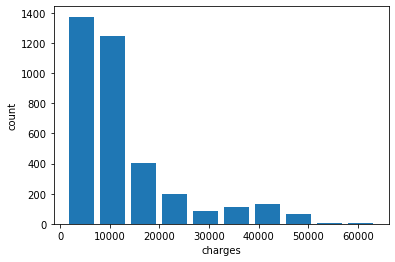

In [8]:
plt.hist(df.charges,rwidth=0.8)
plt.xlabel('charges')
plt.ylabel('count')

In [9]:
chg=df.bmi.describe()
chg

count    3630.000000
mean       30.629652
std         5.441307
min        15.960000
25%        26.694526
50%        30.200000
75%        34.100000
max        53.130000
Name: bmi, dtype: float64

In [10]:
df[df.charges>chg['max']-1000]

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


In [11]:
i=15
x=[]
while i<55:
    df1=df[(df.bmi>=i) & (df.bmi<i+5)]
    x.append(f"{i}-{i+5}")
    x.append(int(df1.charges.mean()))
    x.append(df1.shape[0])
    x.append(round(df1[df1['smoker']=='yes'].shape[0]/df1.shape[0],3))
    i+=5
series=np.reshape(x,(-1,4))
df1=pd.DataFrame(series,columns=['range(BMI)','Charge(avg)','Counts','Ratio(smokers)'])
df1
# plt.bar(df1['range(BMI)'],df1['Charge(avg)'])?

,range(BMI),Charge(avg),Counts,Ratio(smokers)
0,15-20,11117,66,0.182
1,20-25,10568,469,0.171
2,25-30,10546,1232,0.124
3,30-35,13756,1106,0.148
4,35-40,16369,571,0.193
5,40-45,16775,158,0.215
6,45-50,16931,25,0.2
7,50-55,30055,3,0.667


In [12]:
df

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


In [13]:
df.region.unique()

array(['northeast', 'southeast', 'northwest', 'southwest'], dtype=object)

In [14]:
dummies=pd.get_dummies(df.region)
dummies.head()

,northeast,northwest,southeast,southwest
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


In [15]:

dummies2=pd.get_dummies(df.smoker,prefix='smoker')
dummies=pd.concat([dummies,dummies2],axis='columns')
dummies.head()

,northeast,northwest,southeast,southwest,smoker_no,smoker_yes
0,1,0,0,0,1,0
1,0,0,1,0,0,1
2,0,0,1,0,1,0
3,1,0,0,0,1,0
4,0,0,1,0,1,0


In [16]:
df=pd.concat([df,dummies],axis='columns')
df.drop(['sex','smoker','region','southwest','smoker_no'],inplace=True,axis='columns')
df.head()

,age,bmi,children,charges,northeast,northwest,southeast,smoker_yes
0,21.000000,25.745000,2,3279.868550,1,0,0,0
1,36.976978,25.744165,3,21454.494239,0,0,1,1
2,18.000000,30.030000,1,1720.353700,0,0,1,0
3,37.000000,30.676891,3,6801.437542,1,0,0,0
4,58.000000,32.010000,1,11946.625900,0,0,1,0


In [17]:
x=df.drop(['charges'],axis='columns')
y=df.charges
x.head()

,age,bmi,children,northeast,northwest,southeast,smoker_yes
0,21.000000,25.745000,2,1,0,0,0
1,36.976978,25.744165,3,0,0,1,1
2,18.000000,30.030000,1,0,0,1,0
3,37.000000,30.676891,3,1,0,0,0
4,58.000000,32.010000,1,0,0,1,0


In [18]:
from sklearn import linear_model,model_selection
model_LR=linear_model.LinearRegression()

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(2904, 7)
(726, 7)


In [20]:
model_LR.fit(X_train,y_train)
model_LR.score(X_test,y_test)

0.7073888121812428

In [21]:
from sklearn.model_selection import cross_val_score
cv=model_selection.ShuffleSplit(n_splits=5,test_size=0.2)
scores=cross_val_score(linear_model.Lasso(),x,y,cv=cv)
scores

array([0.72241747, 0.68110681, 0.70786105, 0.66322308, 0.74756784])

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [23]:
params_model={
    'Linear_Regression':{
        'model': LinearRegression(),
        'params' : {
            'normalize' : ['True','False']
        } 
    },
    'lasso': {
        'model': Lasso(),
        'params' : {
            'alpha': [1,2],
            'selection': ['random','cyclic']
        }
    },
    'decision_tree':{
        'model': DecisionTreeRegressor(),
        'params':{
            'criterion':['mse','friedman_mse'],
            'splitter':['best','random']
        }
    }
}

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
scores = []

for model_name, mp in params_model.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
#     print(clf.cv_results_)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,Linear_Regression,0.715283,{'normalize': 'True'}
1,lasso,0.715296,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.852354,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [26]:
model=DecisionTreeRegressor(criterion='friedman_mse',splitter='best')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8384799375556604

In [27]:
# np.where(x.columns=='bmi')[0][0]
x.columns

Index(['age', 'bmi', 'children', 'northeast', 'northwest', 'southeast',
       'smoker_yes'],
      dtype='object')

In [28]:
def predict_charges(age,bmi,no_children,location,smoker):
    if(np.where(x.columns==location)[0].size):
        loc_location=np.where(x.columns==location)[0][0]
        arr[loc_location]=1
    arr=np.zeros(len(x.columns))
    arr[0]=age
    arr[1]=bmi
    arr[2]=no_children
    if(smoker=='yes'):
        arr[len(x.columns)-1]=1
    return model.predict([arr])

In [29]:
predict_charges(40,37,3,'southwest','yes')

array([40103.89])

In [30]:
model_LR.predict([[40,37,3,0,0,0,1]])

array([33877.10155877])

In [31]:
model.temp=2
print(model.temp)

2
